<a href="https://colab.research.google.com/github/Neha-Seirah/ML-Activities-/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import\
accuracy_score, precision_score, recall_score, f1_score,\
roc_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC as svc
import seaborn as sb

In [6]:
path = '/content/drive/MyDrive/brain tumor dataset/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
x = []
y = []
for cls in classes:
  pth = os.path.join(path, cls)
  for j in os.listdir(pth):
    img = cv2.imread(os.path.join(pth, j), 0)
    img = cv2.resize(img, (200, 200))
    x.append(img)
    y.append(classes[cls])

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
pd.Series(y).value_counts()

1    827
0    395
dtype: int64

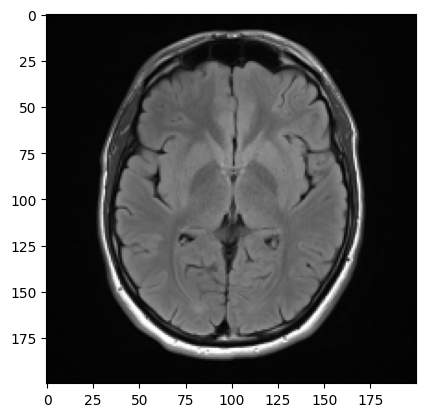

In [9]:

pt.imshow(x[0], cmap='gray');

In [10]:
x = x.reshape(len(x), -1)

In [11]:
x = x.reshape(len(x), -1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10,
                                                    test_size=.20)

In [13]:

sv = svc()
sv.fit(x_train, y_train)

SVC()

In [14]:

print("Training Score:", sv.score(x_train, y_train))
print("Testing Score:", sv.score(x_test, y_test))

Training Score: 0.9887410440122825
Testing Score: 0.9551020408163265


In [16]:

ages = []
for i in range(1232):
  ages.append(np.random.randint(30,90))

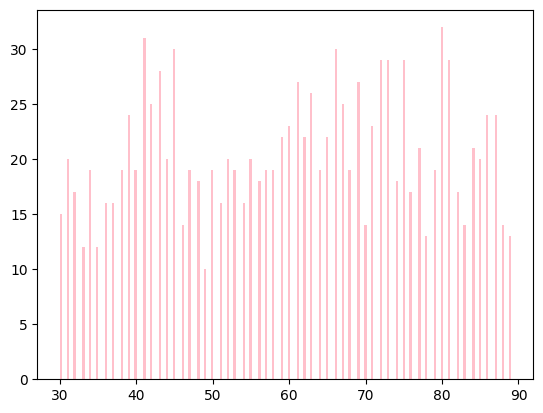

In [17]:
pt.hist(ages, bins=200, color='pink');

In [18]:
sb.heatmap(np.corrcoef(ages, y), annot=True, cmap='flare', linewidths=6,\
           xticklabels=['age', 'tumor'], yticklabels=['age', 'tumor']);

ValueError: ignored

In [15]:

y_pred = sv.predict(x_test)


In [19]:
print('the precision score is',precision_score(y_test, y_pred))
print('the recall score is',recall_score(y_test, y_pred))
print('the f1-score is',f1_score(y_test, y_pred))

the precision score is 0.9526627218934911
the recall score is 0.9817073170731707
the f1-score is 0.9669669669669669


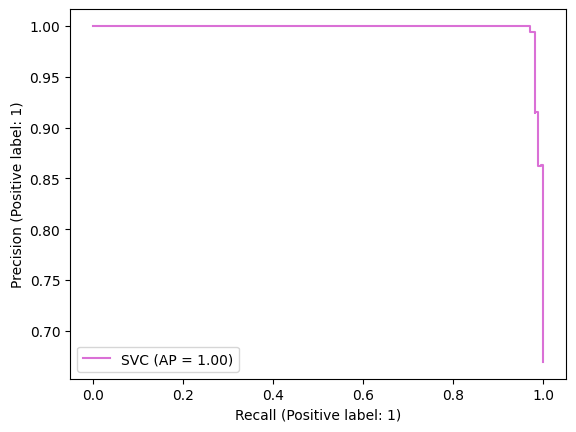

In [20]:

PrecisionRecallDisplay.from_estimator(sv, x_test, y_test, color='orchid');

In [21]:
sv = svc(probability=True)

In [22]:
sv.fit(x_train, y_train)

SVC(probability=True)

In [23]:

y_pred = sv.predict_proba(x_test)

In [24]:
fpr, tpr, thr = roc_curve(y_test, y_pred[:,1])

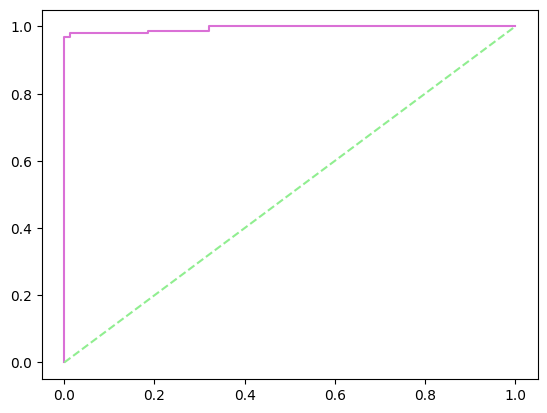

In [25]:

pt.plot(fpr, tpr, color='orchid')
pt.plot([0, 1], ls="--", color='lightgreen');

In [1]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}
grid = GridSearchCV(svc(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

NameError: ignored

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))
